<a href="https://colab.research.google.com/github/CyJavac/CIENCIA_DATOS_2025/blob/main/Clase_2_FCiencia_datos_Medidas_de_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features = Columnas

Tipo de Features

Datos atipicos = outliers

Registros = Filas

Dataframe = Tabla de datos


#Estimación y Metricas
##Media
###Media (mean):
Suma de todos los valores entre la cantidad de valores. Sensible a los datos.

###Media truncada (trimmed mean)
Se ignora un numero fijo de valres ordenados y se calcula el promedio de los restantes.

###Media ponderada (weighted mean)
Multiplica cada valor de x por su peso w, diviendo por la suma de las ponderaciones.


##Mediana
###Mediana (median)
Medida de estimación robusta ya que no se encuentra afectada por vaores atipicos (outliers). Valo central de una lista de valores ordenados de menor a mayor.

###Mediana ponderada (weighted median)
1. Ordenar los datos
2. Calcular la ponderación asociada.
3. Valor tal que la suma de las ponderaciones es igual para las mitades inferior y superior de la lista ordenada.

##Nube de datos

Asimetría negativa o a la izquierda: Media < Mediana < Moda

Simetrica: Media = Mediana = Moda

Asimetría positiva o a la derecha: Media > Mediana > Moda

#MEDIDAS DE TENDENCIA CENTRAL
1. Trabajando con dataframes.
2. Overview de los datos.
3. Obtener las medidas centrales.
4. Analizar graficas.

In [2]:
!pip install statsmodels

In [3]:
!pip install wquantiles

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

##1. Trabajando con dataframes

In [5]:
estado = pd.read_csv("/content/state.csv")

In [6]:
#Ver primeros 5 registros:
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
estado["Murder.Rate"].head()

,Murder.Rate
0,5.7
1,5.6
2,4.7
3,5.6
4,4.4


In [8]:
#Ver los 5 ultimos registros.
estado.tail(5)

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [9]:
#Ver 5 registros al azar
estado.sample(5)

,State,Population,Murder.Rate,Abbreviation
14,Iowa,3046355,1.9,IA
46,Washington,6724540,2.5,WA
31,New York,19378102,3.1,NY
17,Louisiana,4533372,10.3,LA
7,Delaware,897934,5.8,DE


In [12]:
#Saca medidas de tendencia central. (No es la mejor manera)
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Overview de los datos
Analizar las columnas presentes en el dataframe

In [14]:
#Mostrar columnas o features
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [15]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


##2.1 Estimamos las tasas de población y asesinatos

In [16]:
estado["Population"].mean()

np.float64(6162876.3)

In [17]:
estado["Population"].median()

4436369.5

In [19]:
#Media truncada
trim_mean(estado["Population"], 0.1)

np.float64(4783697.125)

In [20]:
#Media ponderada de asesinatos æ
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

In [22]:
# Ó
estado["Murder.Rate"].mean()

np.float64(4.066)

In [23]:
np.average(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.445833981123393)

In [24]:
#Mediana ponderada de asesinatos
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

<Axes: >

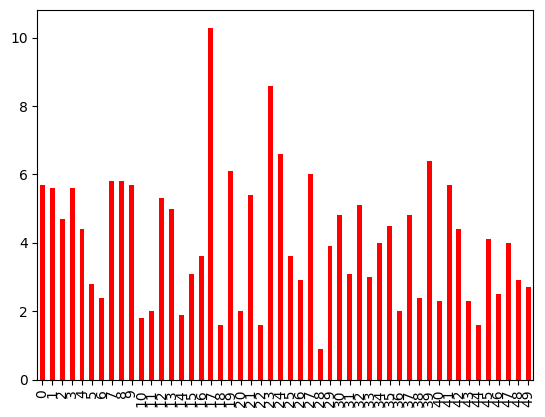

In [28]:
estado["Murder.Rate"].plot.bar(color="red")

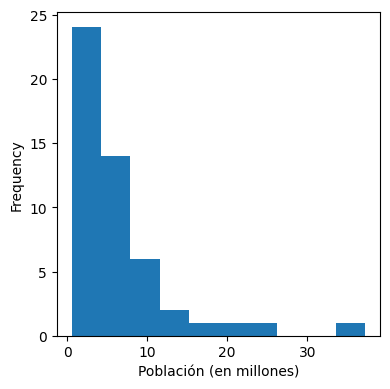

In [29]:
ax=(estado["Population"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (en millones)")
plt.tight_layout()
plt.show()

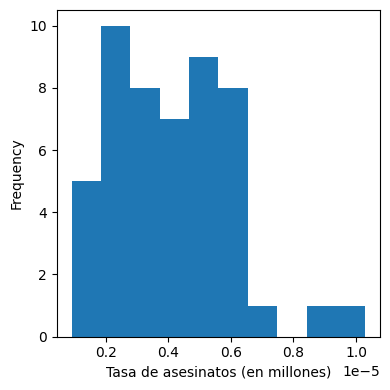

In [30]:
ax=(estado["Murder.Rate"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de asesinatos (en millones)")
plt.tight_layout()
plt.show()

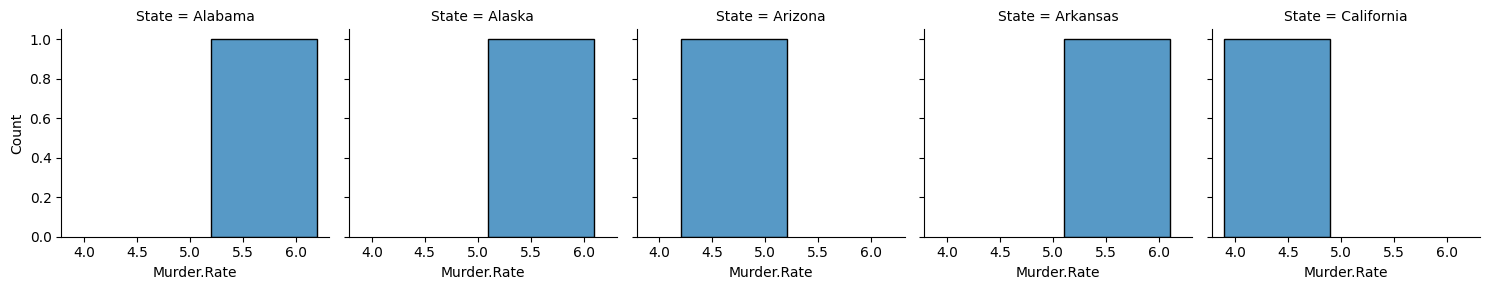

In [33]:
analisis=estado.head()
g=sns.FacetGrid(analisis, col="State")
g.map(sns.histplot, "Murder.Rate")

#ACTIVIDAD
Buscar un dataset y realizar las medidas de tendencia central. (Como clase de 8 Septiembre)

In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

##1. Trabajando con dataframes

In [34]:
dataSmmh = pd.read_csv("/content/smmh.csv")

In [35]:
#Ver primeros 5 registros:
dataSmmh.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [38]:
dataSmmh["2. Gender"].head()

,2. Gender
0,Male
1,Female
2,Female
3,Female
4,Female


In [39]:
#Ver los 5 ultimos registros.
dataSmmh.tail(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4
480,11/12/2022 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,...,1,3,1,1,3,3,2,2,2,3


In [40]:
#Ver 5 registros al azar
dataSmmh.sample(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
122,4/19/2022 21:15:10,20.0,Female,Single,University Student,University,Yes,"Facebook, YouTube, Snapchat, Pinterest",Between 4 and 5 hours,4,...,5,5,2,5,2,3,1,5,4,3
262,5/11/2022 20:15:24,22.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 1 and 2 hours,2,...,2,2,2,3,4,3,3,3,2,2
300,5/11/2022 21:46:44,23.0,Male,In a relationship,University Student,"University, Company, Private",Yes,"Facebook, Instagram, YouTube, Snapchat, Pinterest",Between 2 and 3 hours,3,...,5,3,5,3,3,3,3,5,1,4
47,4/18/2022 22:00:21,17.0,Female,Single,School Student,NaN,Yes,"Instagram, YouTube, Reddit, Pinterest",Between 3 and 4 hours,4,...,1,3,5,3,4,2,1,3,5,1
71,4/19/2022 0:24:52,23.0,Male,Single,School Student,"University, Company",Yes,"Instagram, YouTube, Discord, Reddit",Between 2 and 3 hours,5,...,5,5,5,5,5,5,5,5,5,5


In [41]:
#Saca medidas de tendencia central. (No es la mejor manera)
dataSmmh.describe()

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##2. Overview de los datos
Analizar las columnas presentes en el dataframe

In [42]:
#Mostrar columnas o features
dataSmmh.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [43]:
dataSmmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

##2.1 Estimamos las tasas de población y asesinatos

In [44]:
dataSmmh["9. How often do you find yourself using Social media without a specific purpose?"].mean()

np.float64(3.553014553014553)

In [45]:
dataSmmh["9. How often do you find yourself using Social media without a specific purpose?"].median()

4.0

In [46]:
#Media truncada
trim_mean(dataSmmh["9. How often do you find yourself using Social media without a specific purpose?"], 0.1)

np.float64(3.618181818181818)

In [48]:
#Media ponderada
wquantiles.median(dataSmmh["12. On a scale of 1 to 5, how easily distracted are you?"], weights=dataSmmh["9. How often do you find yourself using Social media without a specific purpose?"])

np.float64(3.0)

<Axes: >

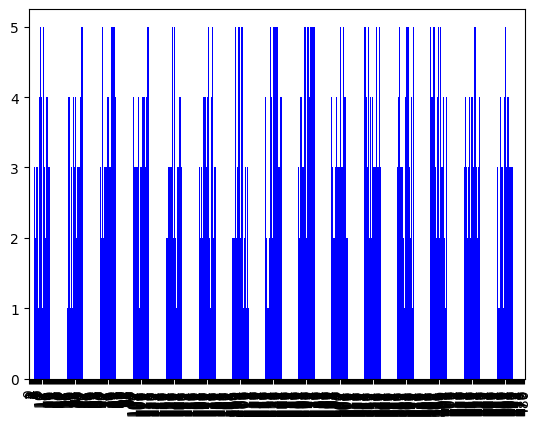

In [50]:
dataSmmh["12. On a scale of 1 to 5, how easily distracted are you?"].plot.bar(color="blue")

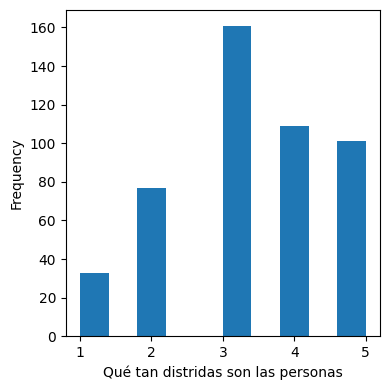

In [57]:
ax=(dataSmmh["12. On a scale of 1 to 5, how easily distracted are you?"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Qué tan distridas son las personas")
plt.tight_layout()
plt.show()

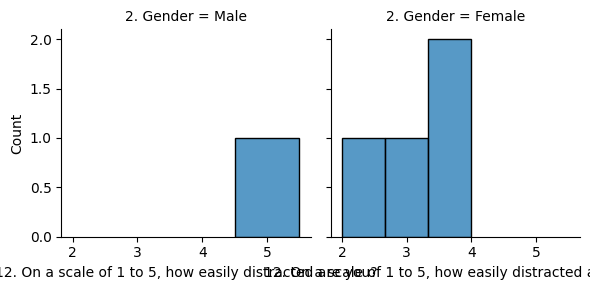

In [58]:
analisis=dataSmmh.head()
g=sns.FacetGrid(analisis, col="2. Gender")
g.map(sns.histplot, "12. On a scale of 1 to 5, how easily distracted are you?")